DATASET

The dataset has the following list of attributes:

**Type of dependent variables (7 types of steel plates faults):**

| Attribute | No.	Attribute |
|--|--|
|1 | Pastry|
|2 | Z_Scratch|
|3 | K_Scratch|
|4 | Stains|
|5 | Dirtiness|
|6 | Bumps|
|7 | Other_Faults|

**27 independent variables:**

|Attribute No. |	Attribute | 	Attribute No. |	Attribute |
| -- | -- | -- | -- |
|1 |		X_Minimum |	15 |	Edges_Index |
|2 |		X_Maximum |	16 |	Empty_Index |
|3 |		Y_Minimum |	17 |	Square_Index |
|4 |		Y_Maximum |	18 |	Outside_X_Index |
|5 |		Pixels_Areas |	19 |	Edges_X_Index |
|6 |		X_Perimeter |	20 |	Edges_Y_Index |
|7 |		Y_Perimeter |	21 |	Outside_Global_Index |
|8 |		Sum_of_Luminosity |	22 |	LogOfAreas |
|9 |		Minimum_of_Luminosity |	23 |	Log_X_Index |
|10 |		Maximum_of_Luminosity |	24 |	Log_Y_Index |
|11 |		Length_of_Conveyer |	25 |	Orientation_Index |
|12 |		TypeOfSteel_A300 |	26 |	Luminosity_Index |
|13 |		TypeOfSteel_A400 |	27 |	SigmoidOfAreas |
|14 |		Steel_Plate_Thickness | |	 |	

Among the independent variables, only the steel types (12th and 13th) are categorical variables, the rest are numeric.

1) For this exercise use a neural network and see how well you could predict the type of faults in steel plates from numeric attributes only.

    Note: To save time and energy use the hidden layer numbers and number of nodes in hidden layers that your computer can handle.

In [127]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.metrics import roc_auc_score

In [128]:
#Importing the datset from file

column_names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity'
                ,'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index'
                ,'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index'
                ,'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas','Pastry','Z_Scratch','K_Scratch','Stains','Dirtiness','Bumps','Other_Faults']

steel_faults_df = pd.read_csv('~/UW/IMT_574/Week9/Homework/dataset-Faults.csv', sep='\t', header= None, names=column_names)

steel_faults_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [129]:
# #Checking null values
# faults_dataframe.isna().sum()

In [130]:
steel_faults_df = steel_faults_df.dropna()

In [131]:
# faults_dataframe.info()

In [132]:
#Function to "merge" all fault types into a single column
def merge_fault_types(row):

    fault = None
    
    for column in ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']:
        if row[column] == 1:
            fault = column
            
    return fault    


In [133]:

steel_faults_df['Fault_Class'] = steel_faults_df.apply(merge_fault_types, axis=1)
steel_faults_df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults,Fault_Class
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.1139,0.5296,0,0,0,0,0,0,1,Other_Faults


In [134]:
steel_faults_df.to_csv('~/UW/IMT_574/Week9/Homework/data_test.csv', index=False)

In [135]:
#Stats of the original dataset
steel_faults_df.describe().T.style.background_gradient(cmap = 'Greys')

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.000000,571.136012,520.690671,0.000000,51.000000,435.000000,1053.000000,1705.000000
X_Maximum,1941.000000,617.964451,497.627410,4.000000,192.000000,467.000000,1072.000000,1713.000000
Y_Minimum,1941.000000,1650684.868109,1774578.414728,6712.000000,471253.000000,1204128.000000,2183073.000000,12987661.000000
Y_Maximum,1941.000000,1650738.705307,1774590.089000,6724.000000,471281.000000,1204136.000000,2183084.000000,12987692.000000
Pixels_Areas,1941.000000,1893.878413,5168.459560,2.000000,84.000000,174.000000,822.000000,152655.000000
X_Perimeter,1941.000000,111.855229,301.209187,2.000000,15.000000,26.000000,84.000000,10449.000000
Y_Perimeter,1941.000000,82.965997,426.482879,1.000000,13.000000,25.000000,83.000000,18152.000000
Sum_of_Luminosity,1941.000000,206312.147862,512293.587609,250.000000,9522.000000,19202.000000,83011.000000,11591414.000000
Minimum_of_Luminosity,1941.000000,84.548686,32.134276,0.000000,63.000000,90.000000,106.000000,203.000000
Maximum_of_Luminosity,1941.000000,130.193715,18.690992,37.000000,124.000000,127.000000,140.000000,253.000000


In [136]:
print(f' Number of Null Values: {steel_faults_df.isna().sum().sum()}')

 Number of Null Values: 0


**The dataset doesn't contain null or NaN values**

In [137]:
#Checking correlations
# corrs = steel_faults_df.corr()

# sns.heatmap(corrs)

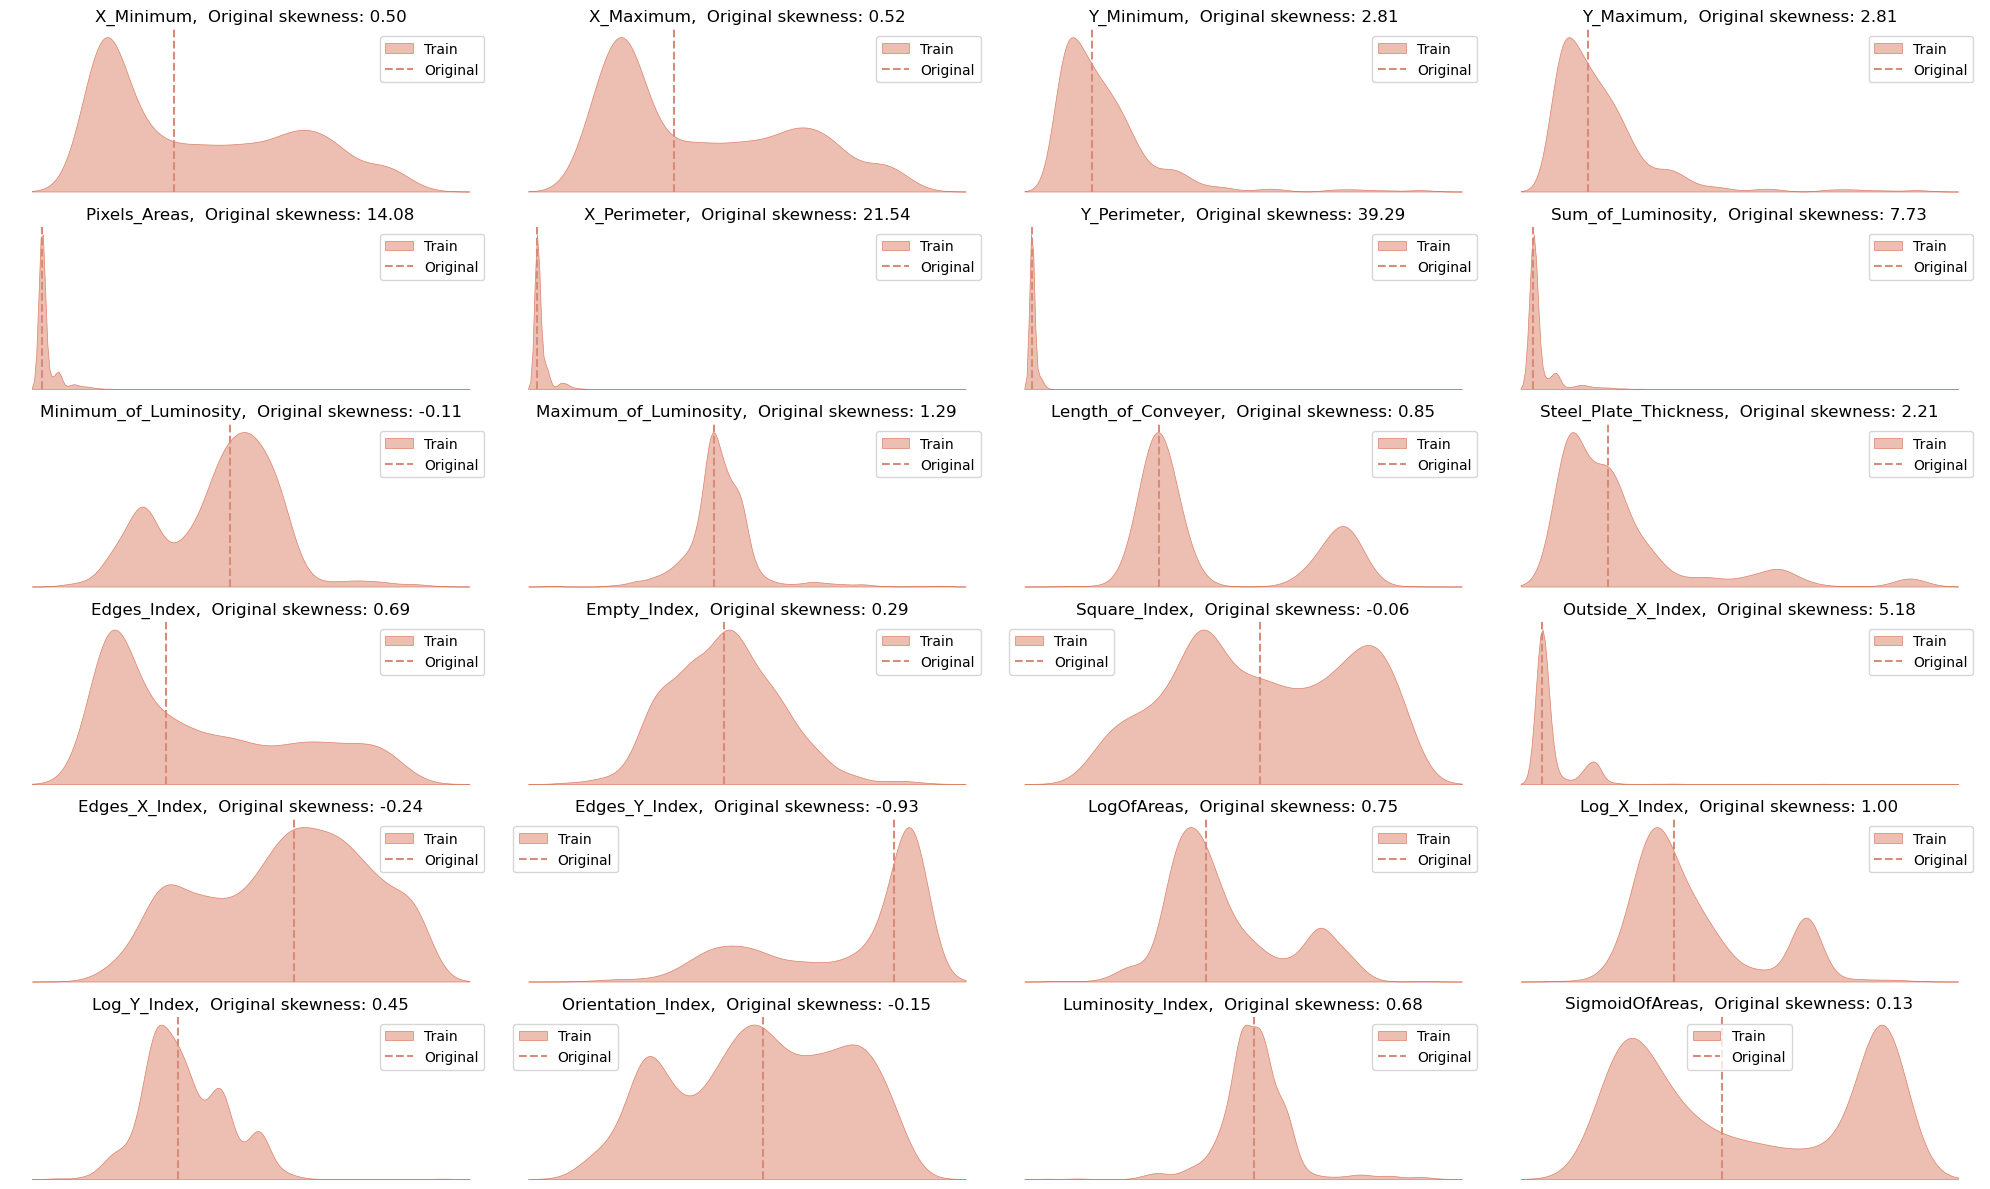

In [138]:
# Checking for distributions
columns_todrop = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A400', 'TypeOfSteel_A300','Outside_Global_Index']
numeric_columns = steel_faults_df.select_dtypes(include=['float64', 'int64']).drop(columns=columns_todrop, axis=1)
# def dist(train_dataset, original_dataset, columns_list, rows, cols):
def dist(original_dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 12))
    axs = axs.flatten()
    for i, col in enumerate(columns_list):
        # sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#058279', label='Train')
        sns.kdeplot(original_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#db8067', label='Original')
        # axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}\n Original skewness: {original_dataset[col].skew():.2f}')
        axs[i].set_title(f'{col},  Original skewness: {original_dataset[col].skew():.2f}')
        axs[i].legend()
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        # median_train = train_dataset[col].median()
        median_org = original_dataset[col].median()
        # axs[i].axvline(x=median_train, color='#4caba4', linestyle='--')
        axs[i].axvline(x=median_org, color='#d68c78', linestyle='--')
        axs[i].legend(labels=['Train', 'Original', 'Median'])
    plt.tight_layout()
    sns.despine(left=True, bottom=True) 
# dist(train_dataset=faults_dataframe, original_dataset=faults_dataframe, columns_list=numeric_columns.columns, rows=6, cols=4)
dist(original_dataset=steel_faults_df, columns_list=numeric_columns.columns, rows=6, cols=4)

/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_1833/3945759537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = steel_faults_df, x=col, palette='pastel');
/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_1833/3945759537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = steel_faults_df, x=col, palette='pastel');
/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_1833/3945759537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = steel_faults_df, x=col, palette='pastel');
/

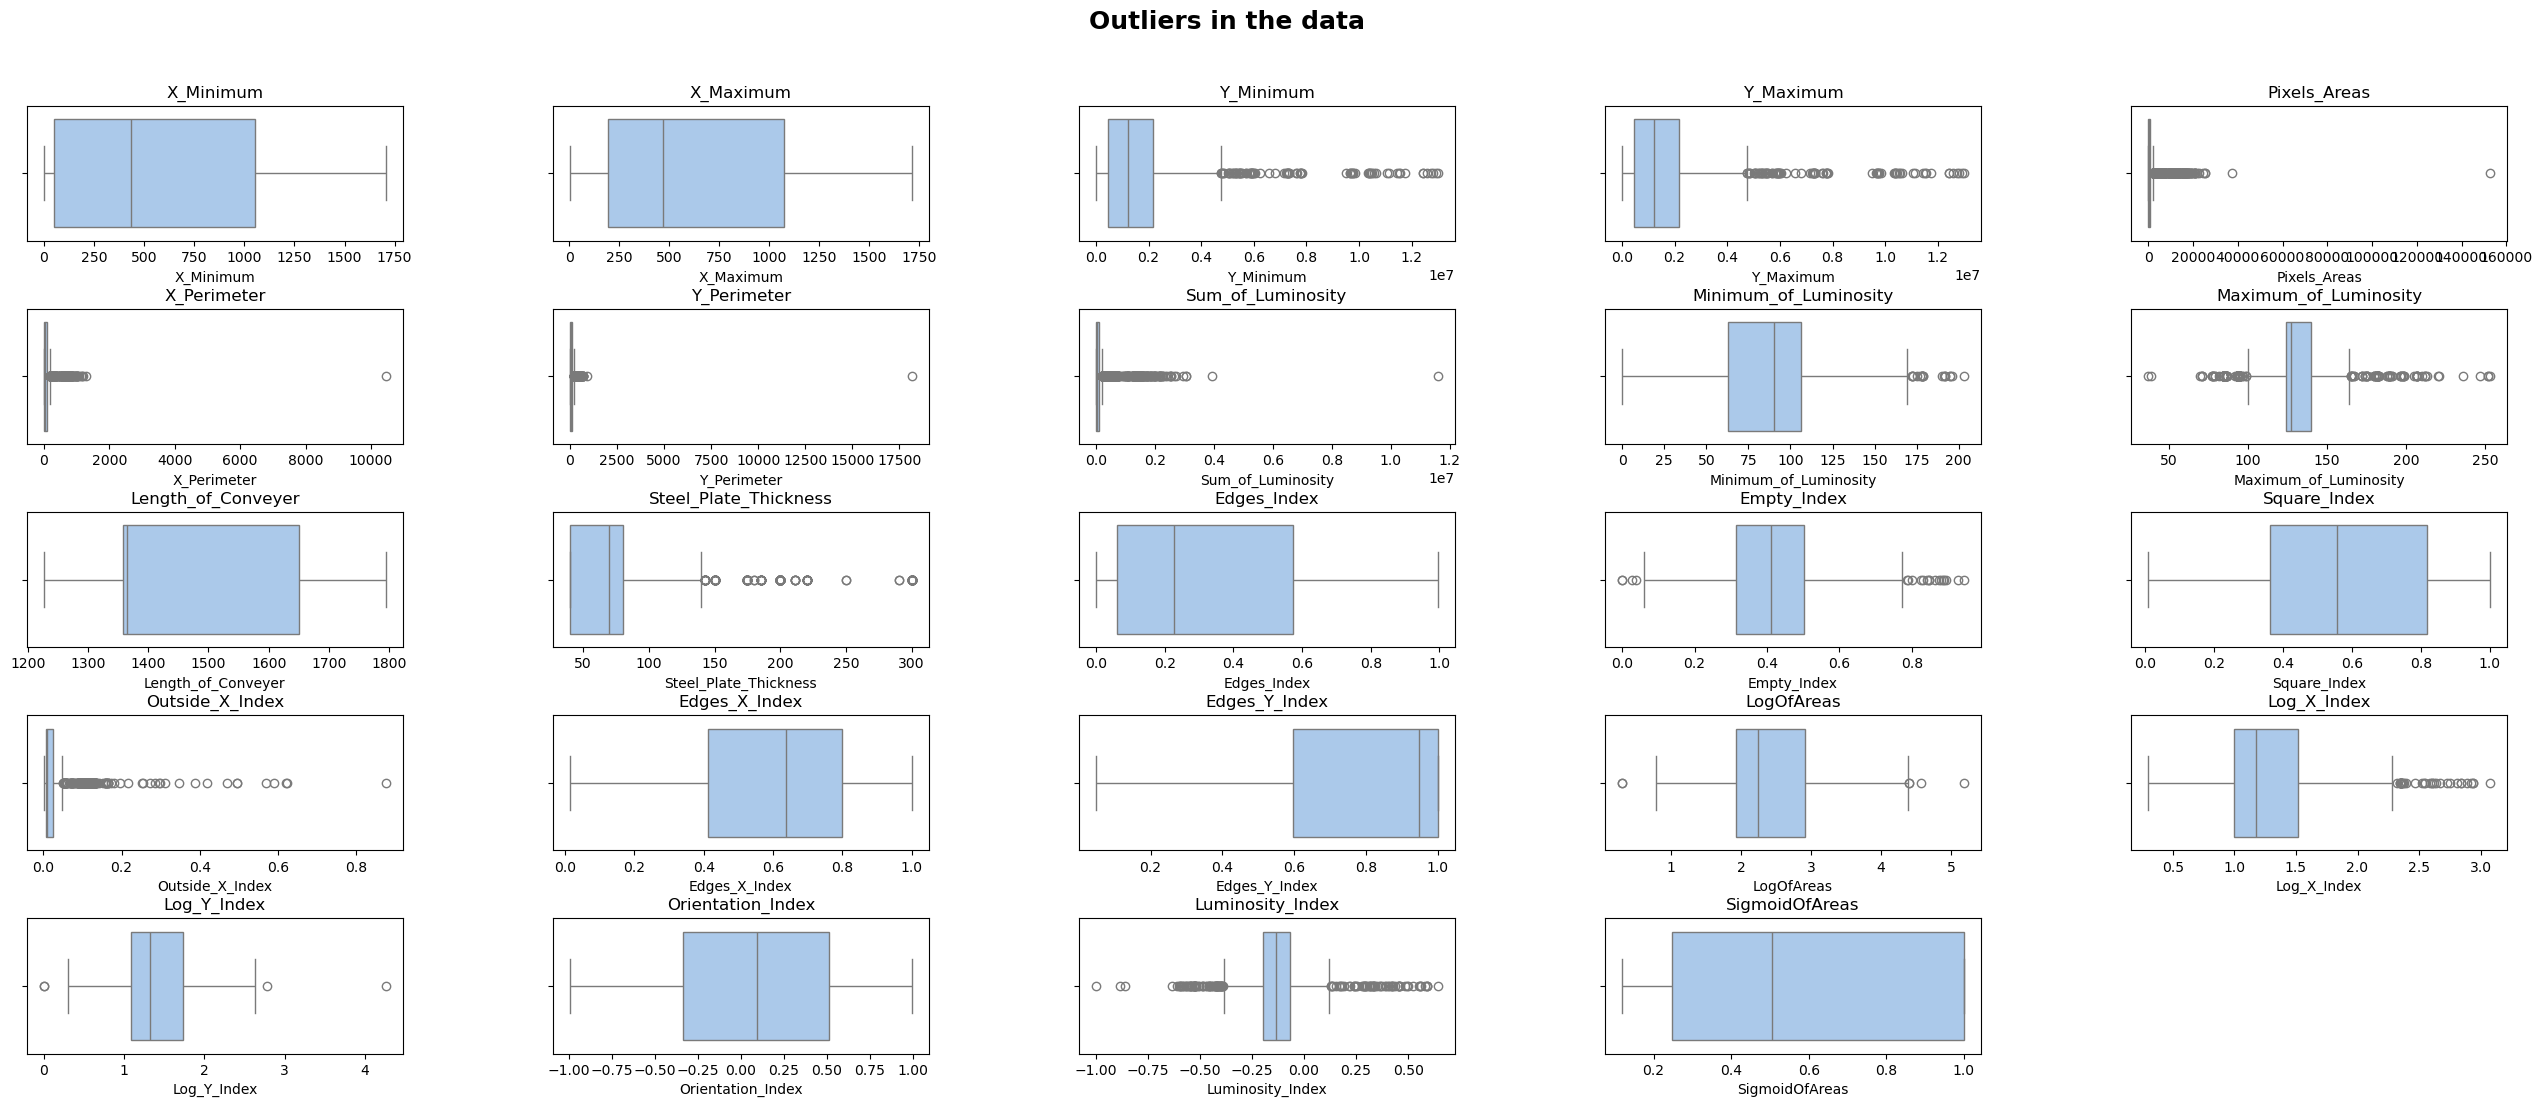

In [139]:
#Check for presence of outliers in each feature
fig = plt.figure(figsize=[32,12])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.9);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(5,5, i+1);
    ax = sns.boxplot(data = steel_faults_df, x=col, palette='pastel');
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()

In [140]:
#Encoding the categorical variable Battle into integers



Encoder = LabelEncoder()
steel_faults_df['Target_Fault'] = Encoder.fit_transform(steel_faults_df['Fault_Class'])
steel_faults_df.drop(['Fault_Class'],axis=1, inplace=True)
steel_faults_df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults,Target_Fault
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,3
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,3
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,3
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,3
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.1139,0.5296,0,0,0,0,0,0,1,3


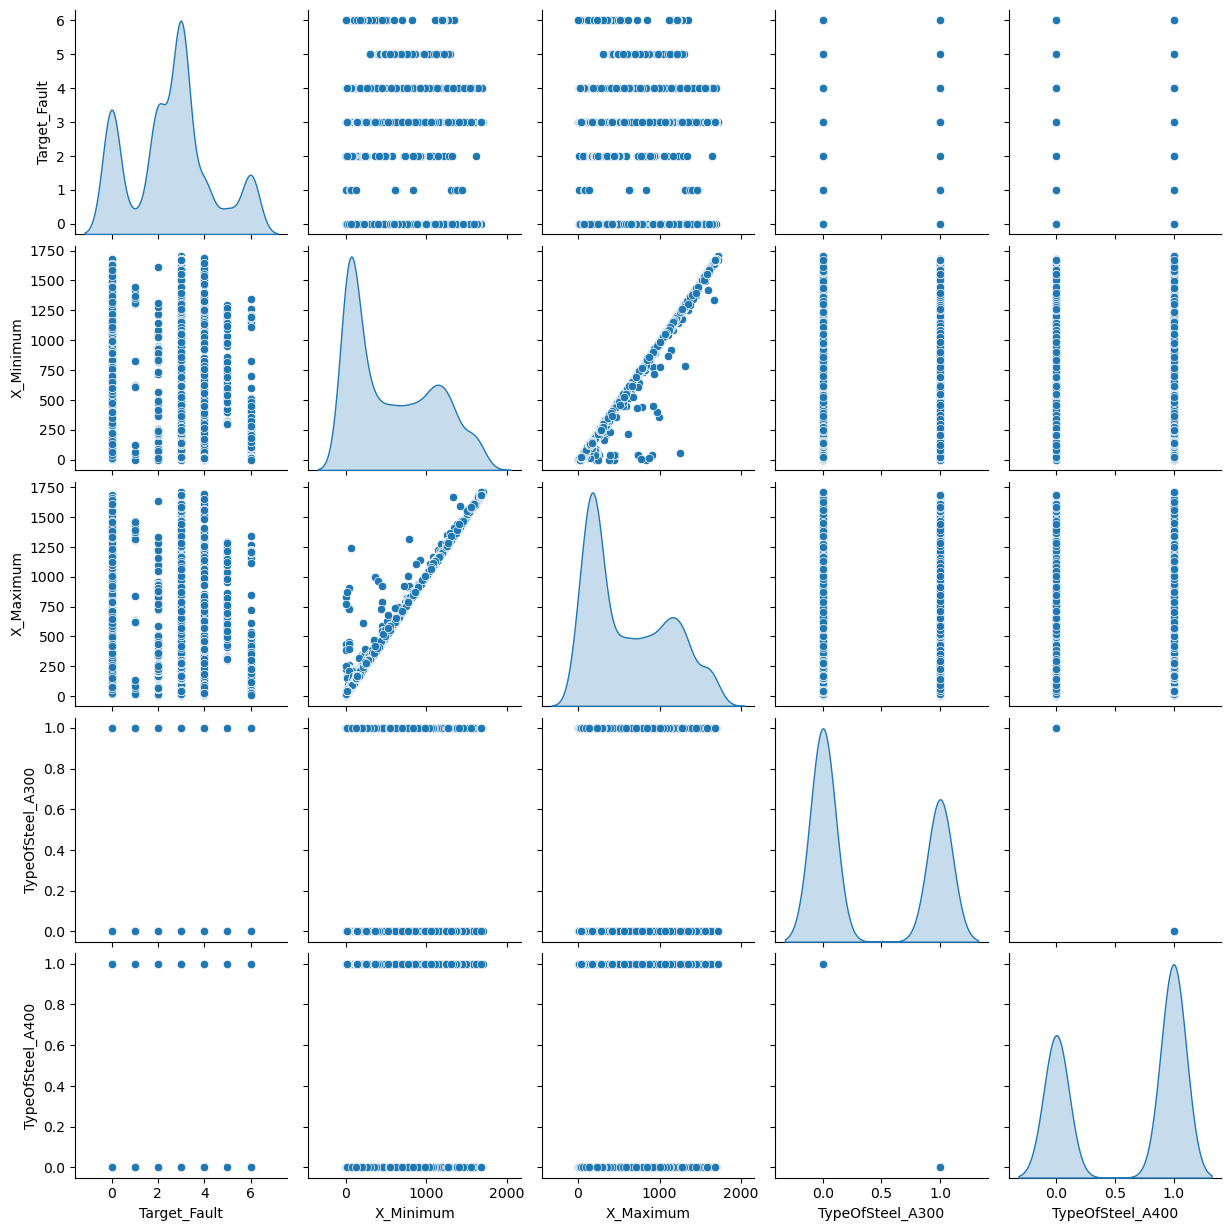

In [141]:
sns.pairplot(steel_faults_df[['Target_Fault','X_Minimum', 'X_Maximum', 'TypeOfSteel_A300', 'TypeOfSteel_A400']], diag_kind='kde')

In [142]:
#Dropping categorical columns (12th & 13th)
steel_faults_df.drop(['TypeOfSteel_A300', 'TypeOfSteel_A400'],axis=1, inplace=True)

<Axes: >

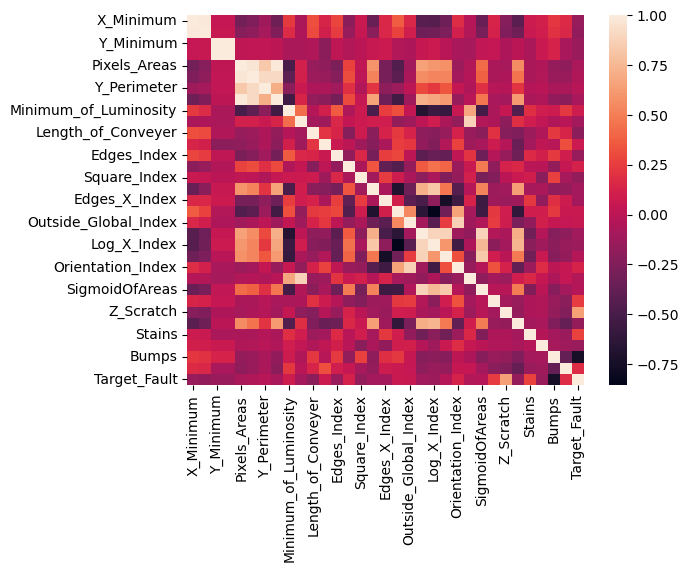

In [143]:
#Checking correlations
corrs = steel_faults_df.corr()
sns.heatmap(corrs)
# sns.heatmap(corrs, annot=True, cmap='crest', fmt='.1f')
# sns.heatmap(corrs, annot=corrs.rank(axis="columns"))

In [144]:
def view_correlations(data, target, title, annot = True, fmt = '.2f', cmap = 'Greens', figsize = (22, 12)):
    fig = plt.figure(figsize = figsize, constrained_layout = True)
    gs = fig.add_gridspec(1, 3)
    
    corr_hm_ax = fig.add_subplot(gs[0, :-1])
    corr_target_ax = fig.add_subplot(gs[0, 2])
    
    mask = np.triu(data.corr())
    
    corr_hm_ax.set_title('Correlation Matrix', size = 15)
    corr_target_ax.set_title(f'Correlation to Target ({target})', size = 15)
    
    sns.heatmap(data.corr(), mask = mask, annot = annot, fmt = fmt, cmap = cmap, ax = corr_hm_ax, cbar = False, annot_kws = {'size': 10})
    sns.heatmap(data.corr()[target].sort_values(ascending = False).to_frame(), annot = annot, fmt = fmt, cmap = cmap)
    
    fig.suptitle(title, size = 20)
    fig.show()
    
defect_map = {'Stains':0, 'Other_Faults':1, 'K_Scatch':2, 'Bumps':3, 'Pastry':4, 'Z_Scracth':5, 'Dirtiness':6, 'N/A':7, '>1_Defect':8}

train_copy = steel_faults_df.copy().drop(steel_faults_df.columns[-8:-1].tolist(), axis = 1)
# train_copy['Target_Fault'] = steel_faults_df['Target_Fault'].map(defect_map)

/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_1833/2148137355.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


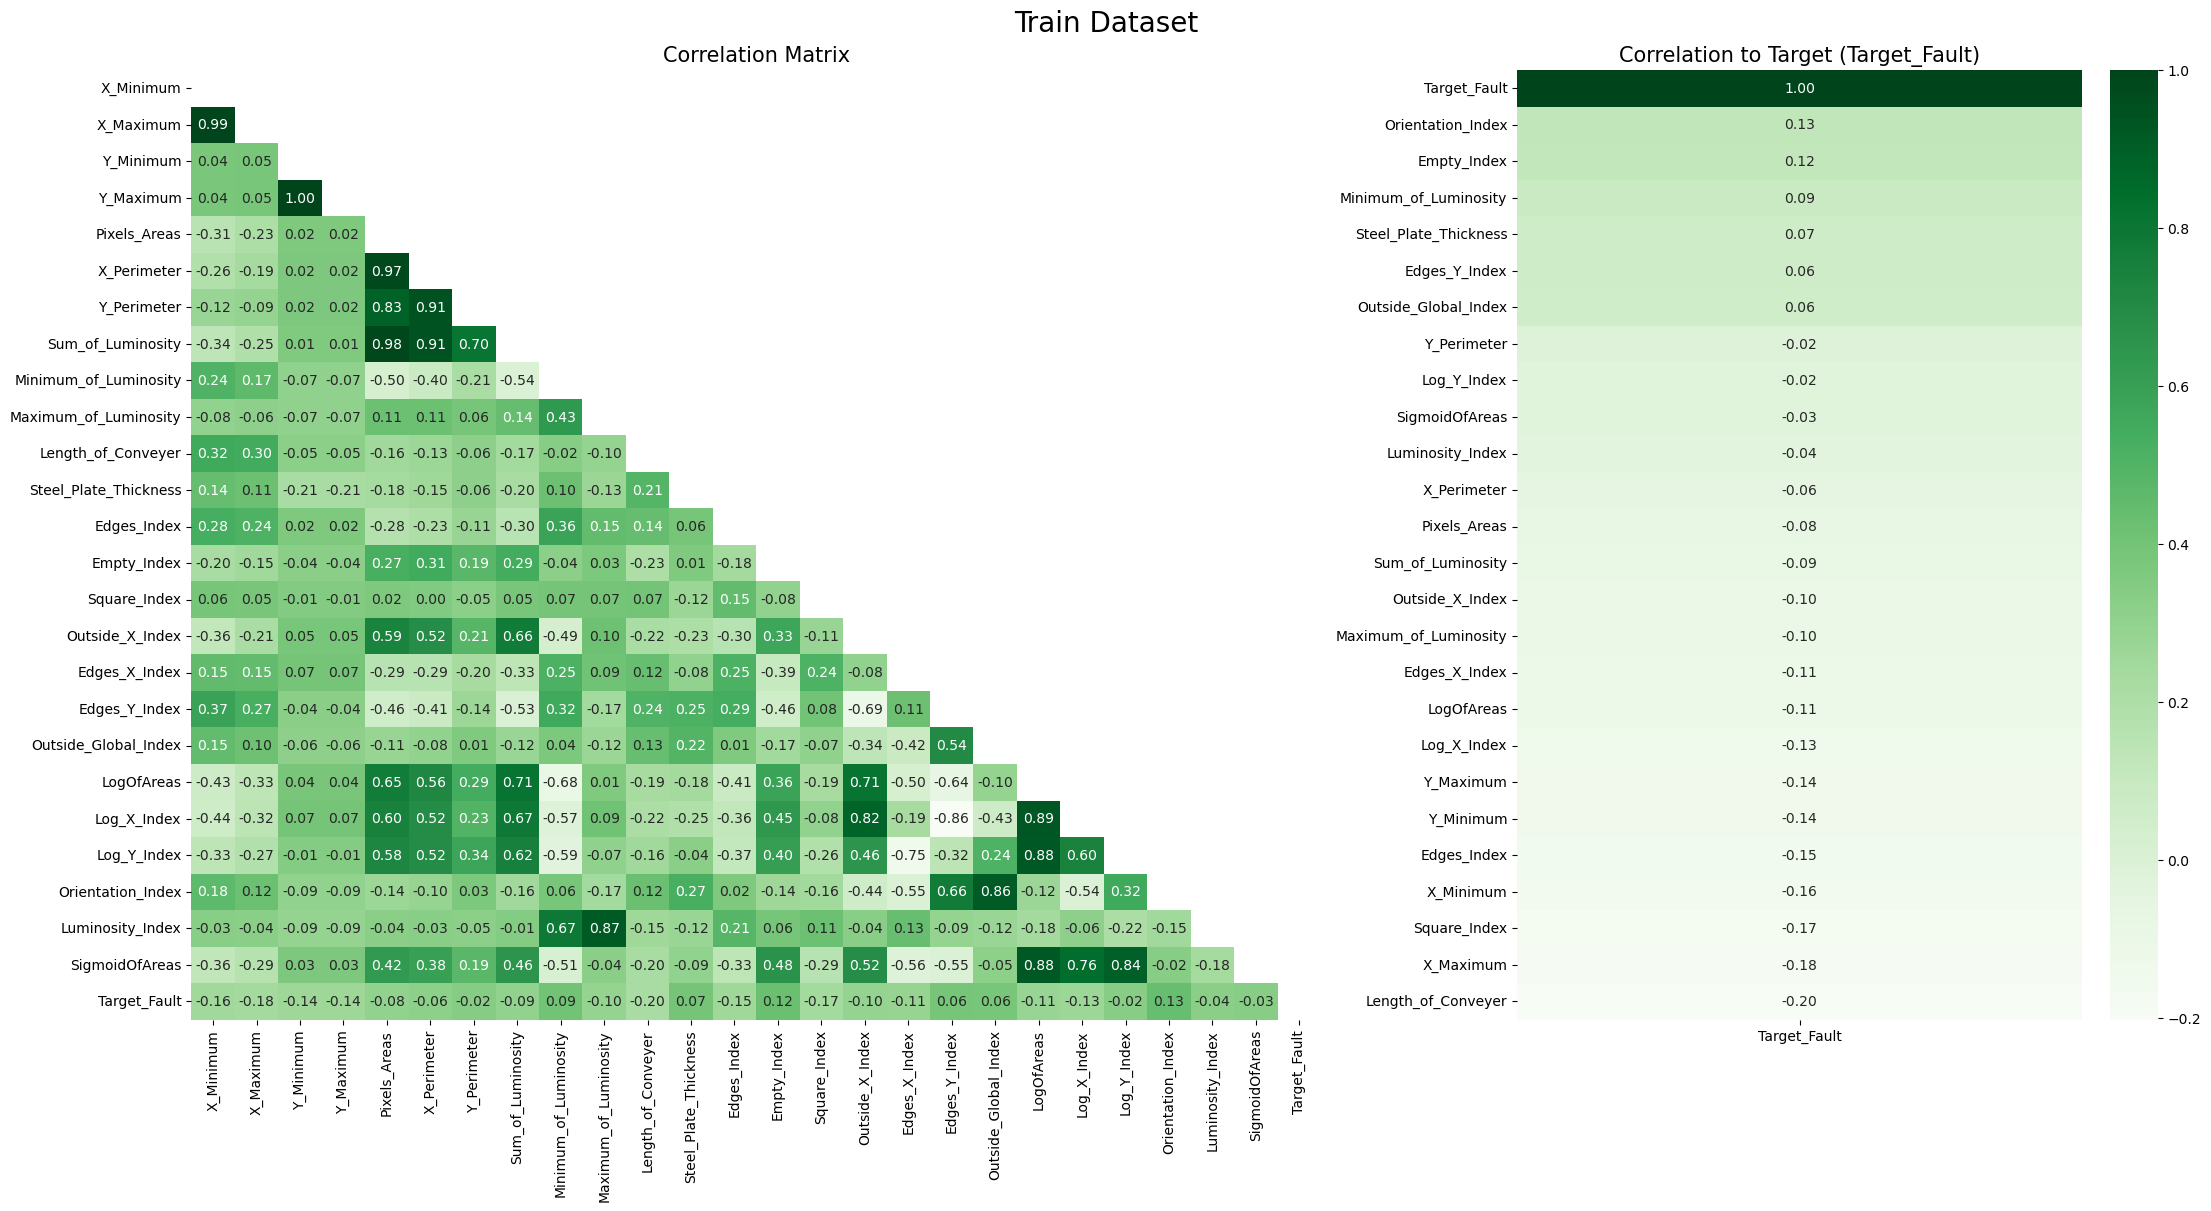

In [145]:
view_correlations(train_copy, 'Target_Fault', title = 'Train Dataset')

In [146]:
#Creating model for Pastry fault
steel_faults_df.drop(['Z_Scratch', 'K_Scratch','Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1, inplace=True)

In [147]:
X_train,X_val,y_train,y_val = train_test_split( steel_faults_df.drop('Pastry',axis=1), steel_faults_df['Pastry'],random_state=4,test_size=0.3)

In [148]:
train_df = steel_faults_df.sample(frac=0.8, random_state=4)
test_df = steel_faults_df.drop(train_df.index)

In [149]:
#Statistics
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1553.0,5.767354e+02,5.202938e+02,0.0000,54.0000,4.510000e+02,1.057000e+03,1.705000e+03
X_Maximum,1553.0,6.235673e+02,4.973315e+02,4.0000,193.0000,4.900000e+02,1.077000e+03,1.713000e+03
Y_Minimum,1553.0,1.612673e+06,1.729271e+06,6712.0000,455871.0000,1.157189e+06,2.150529e+06,1.280650e+07
Y_Maximum,1553.0,1.612729e+06,1.729286e+06,6724.0000,455881.0000,1.157378e+06,2.150756e+06,1.280652e+07
Pixels_Areas,1553.0,1.906232e+03,5.468938e+03,2.0000,84.0000,1.720000e+02,7.940000e+02,1.526550e+05
X_Perimeter,1553.0,1.128416e+02,3.233492e+02,2.0000,15.0000,2.600000e+01,8.300000e+01,1.044900e+04
Y_Perimeter,1553.0,8.529749e+01,4.734556e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1553.0,2.070188e+05,5.312693e+05,250.0000,9527.0000,1.900200e+04,7.847000e+04,1.159141e+07
Minimum_of_Luminosity,1553.0,8.468255e+01,3.237610e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,1.960000e+02
Maximum_of_Luminosity,1553.0,1.302234e+02,1.847978e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


In [150]:
train_df.describe().transpose()[['mean', 'std']]

,mean,std
X_Minimum,5.767354e+02,5.202938e+02
X_Maximum,6.235673e+02,4.973315e+02
Y_Minimum,1.612673e+06,1.729271e+06
Y_Maximum,1.612729e+06,1.729286e+06
Pixels_Areas,1.906232e+03,5.468938e+03
X_Perimeter,1.128416e+02,3.233492e+02
Y_Perimeter,8.529749e+01,4.734556e+02
Sum_of_Luminosity,2.070188e+05,5.312693e+05
Minimum_of_Luminosity,8.468255e+01,3.237610e+01
Maximum_of_Luminosity,1.302234e+02,1.847978e+01


In [151]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [152]:
normalizer.adapt(np.array(train_df))

In [153]:
print(normalizer.mean.numpy())

[[ 5.7673535e+02  6.2356726e+02  1.6126731e+06  1.6127291e+06
   1.9062318e+03  1.1284160e+02  8.5297485e+01  2.0701880e+05
   8.4682549e+01  1.3022343e+02  1.4595022e+03  7.9671600e+01
   3.3500585e-01  4.1381836e-01  5.6905192e-01  3.3333160e-02
   6.0963446e-01  8.1526232e-01  5.8370894e-01  2.4851167e+00
   1.3306376e+00  1.4017484e+00  8.8167995e-02 -1.3053484e-01
   5.8150369e-01  8.5640699e-02  2.5943336e+00]]


In [154]:
first = np.array(train_df[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   581.      652.   148364.   148463.     3187.      208.      198.
  336567.       87.      127.     1306.       40.        0.89      0.55
       0.72      0.05      0.34      0.5       1.        3.5       1.85
       2.        0.28     -0.17      1.        0.        0.  ]]

Normalized: [[ 0.01  0.06 -0.85 -0.85  0.23  0.29  0.24  0.24  0.07 -0.17 -1.06 -0.71
   1.84  0.94  0.55  0.35 -1.1  -1.35  0.87  1.29  1.08  1.3   0.39 -0.3
   1.24 -0.31 -1.46]]


In [155]:
#Normalizing the dataset in (0,1) range
# max_val = train_df.max(axis= 0)
# min_val = train_df.min(axis= 0)
 
# range = max_val - min_val
# train_df = (train_df - min_val)/(range)
 
# test_df =  (test_df- min_val)/range

In [156]:
# #Normalizing the dataset
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(train_df)
# X_train=pd.DataFrame(X_train, columns=faults_dataframe.columns)

# X_test = scaler.transform(test_df)
# X_test=pd.DataFrame(X_test, columns=faults_dataframe.columns)

In [157]:
# now let's separate the targets and labels
# X_train = train_df.drop('Pastry',axis=1)
# X_test = test_df.drop('Pastry',axis=1)

# X_train = train_df.drop(['Pastry', 'Z_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1)
# X_test = test_df.drop(['Pastry', 'Z_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1)

# y_train = train_df['Pastry']
# y_test = test_df['Pastry']
 
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable 
# to save it.
x_shape = [X_train.shape[1]]
 
x_shape

[26]

In [158]:
#Creating the Neural Network with Keras
model = tf.keras.Sequential([
    tf.keras.Input(shape=x_shape),
    tf.keras.layers.Dense(units=64, activation='relu'), #Input layer
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=64, activation='relu'), #Hidden layer, 64 units
    tf.keras.layers.Dense(units=1) #Output layer
])
 
# model.summary()

In [159]:
# Choosing Adam Optimizer, with loss = Mean Absolute Error (MAE)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error', metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss='mae', metrics=['accuracy']) 

In [160]:
#Fitting  the model
losses = model.fit(X_train, y_train, validation_data=(X_val, y_val)
                   , batch_size=256
                   , epochs=25)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3387 - loss: 20593278976.0000 - val_accuracy: 0.0926 - val_loss: 295480.3438
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4560 - loss: 11198445.0000 - val_accuracy: 0.0926 - val_loss: 743799360.0000
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2937 - loss: 257600704.0000 - val_accuracy: 0.9074 - val_loss: 408764.8750
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 510883.4062 - val_accuracy: 0.9074 - val_loss: 22089.6641
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 14292.1133 - val_accuracy: 0.9074 - val_loss: 0.1656
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.1138 - val_accuracy: 0.9074 - val_loss: 34571680.0000
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9142 - loss: 13081532.0000 - val_accuracy: 0.9074 - val_loss: 0.1272
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [161]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
y_pred =model.predict(X_val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [162]:
# y_pred = y_val.iloc[:]

In [163]:
y_val.shape

(583,)

In [164]:
y_pred.shape

(583, 1)

In [165]:
#AUC  One-vs-rest (ovr)
auc_test = roc_auc_score(y_val, y_pred, multi_class='ovr')
print(f"AUC: {auc_test}")

AUC: 0.5


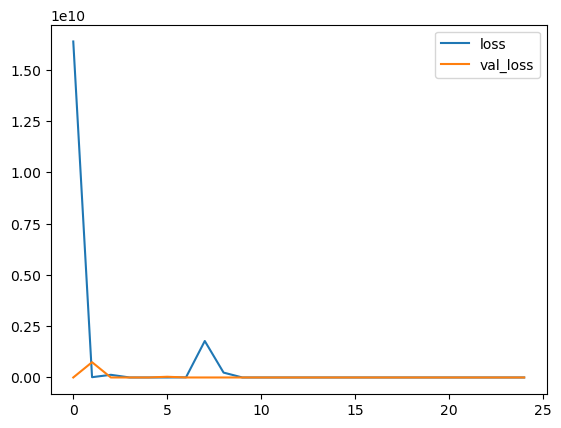

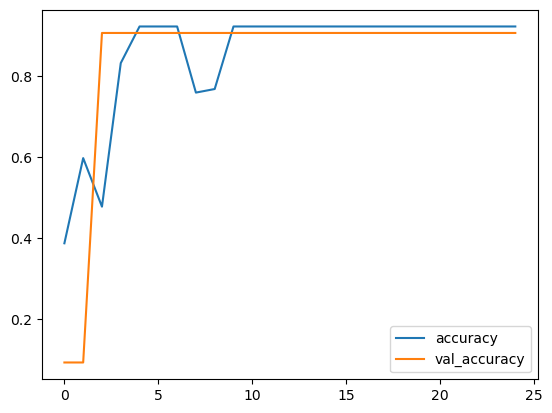

In [166]:
loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()
loss_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [167]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

losses = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    batch_size=256,
                    epochs=25,
                    callbacks=[earlystopping])


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9151 - loss: 0.1148 - val_accuracy: 0.9074 - val_loss: 0.1043
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - loss: 0.0855 - val_accuracy: 0.9074 - val_loss: 0.0964
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.0806 - val_accuracy: 0.9074 - val_loss: 0.1147
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9268 - loss: 0.0913 - val_accuracy: 0.9074 - val_loss: 0.0996
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9251 - loss: 0.0832 - val_accuracy: 0.9074 - val_loss: 0.0951
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9221 - loss: 0.0835 - val_accuracy: 0.9074 - val_loss: 0.1075
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9289 - loss: 0.0853 - val_accuracy: 0.9074 - val_loss: 0.0954
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9128 - loss: 0.0984 - val_accuracy: 0.9074 - val_loss: 0.0941
Epoch 9/

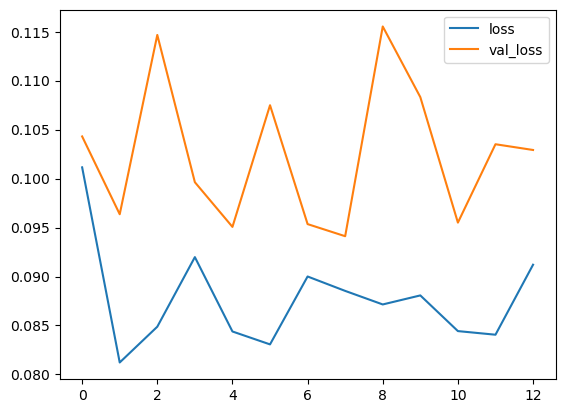

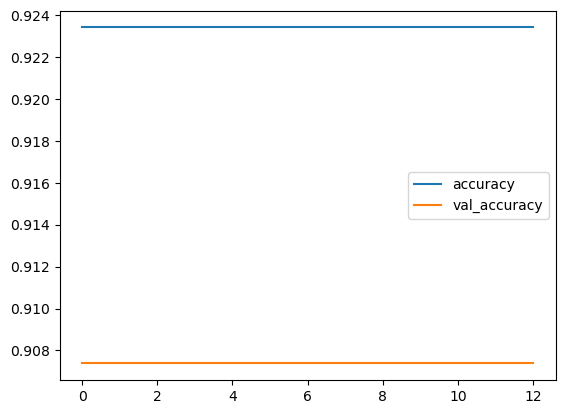

In [168]:

history_df = pd.DataFrame(losses.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()